# Lab 03. 정규성 가정을 만족하지 않는 자료에서의 검정 방법 실습
---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

- 정규 분포를 따르지 않는 데이터를 생성한다. 

In [2]:
pre_treatment = np.random.rand(20) + 1 
post_treatment = np.random.rand(20) + 2

# data 프레임 생성 
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment, 
})

# data csv 파일로 저장 
data.to_csv("./data/non_normal_data.csv", index=False, encoding="utf-8")

- 데이터를 가져온다. 

In [3]:
from scipy.stats import wilcoxon

# 데이터 가져오기 
treatment_data = pd.read_csv('./data/non_normal_data.csv')

# 월콕슨 부호 순위 검정 수행 
stat, p = wilcoxon(treatment_data['pre_treatment'], treatment_data['post_treatment'])

print(stat, p)

0.0 1.9073486328125e-06


In [4]:
if p > 0.05 : 
    print("fail to reject HO")
else : 
    print("reject HO")

reject HO


- 데이터의 분포를 시각화 한다.

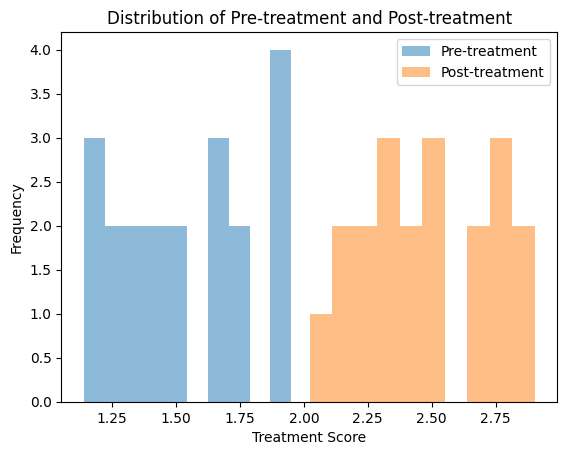

In [5]:
# 분포 시각화
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()

plt.show()